In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Creating a dataframe df with all the values in csv file
df = pd.read_csv('IMDB_Movies.csv')

# Getting first 5 rows of the dataframe
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000
3,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,...,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000
4,NaN,Doug Walker,0,0,131,0,Rob Walker,131,0,Documentary,...,,NaN,NaN,NaN,0,0,12,7.1,0.00,0


In [3]:
# Seeing info of the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     5043 non-null   int64  
 3   duration                   5043 non-null   int64  
 4   director_facebook_likes    5043 non-null   int64  
 5   actor_3_facebook_likes     5043 non-null   int64  
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5043 non-null   int64  
 8   gross                      5043 non-null   int64  
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [4]:
# Dropping columns not to be used 
df.drop(columns=['color', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes',
                'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 
                'country', 'content_rating', 'actor_2_facebook_likes', 'aspect_ratio', 'movie_facebook_likes'],
       inplace=True)

In [5]:
# Checking for columns in the dataframe
df.columns

Index(['director_name', 'num_critic_for_reviews', 'duration', 'gross',
       'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'num_user_for_reviews', 'language', 'budget', 'title_year',
       'imdb_score'],
      dtype='object')

Successfully droped the columns not to be used.

In [6]:
# Cehcking for null values in the columns 
(df.isna().sum()/len(df)) * 100

director_name             2.062265
num_critic_for_reviews    0.000000
duration                  0.000000
gross                     0.000000
genres                    0.000000
actor_1_name              0.138806
movie_title               0.000000
num_voted_users           0.000000
num_user_for_reviews      0.000000
language                  0.277613
budget                    0.000000
title_year                0.000000
imdb_score                0.000000
dtype: float64

In [7]:
# We cannot know the director name, actor_1_name and title year. 
# There are too many null values in budget and gross.
# So, dropping all the null value rows from these columns.
df.dropna(subset=['director_name', 'gross', 'actor_1_name', 'budget', 'title_year'], inplace=True)

In [8]:
df[['director_name', 'gross', 'actor_1_name', 'budget', 'title_year']].isna().sum()

director_name    0
gross            0
actor_1_name     0
budget           0
title_year       0
dtype: int64

All the null value rows in director column have been removed.

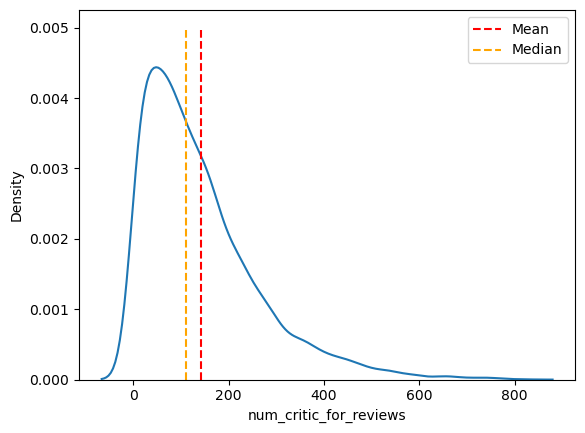

In [9]:
# Creating a kde plot for num_critic_for_reviews and drawing mean and median lines
sns.kdeplot(x='num_critic_for_reviews', data=df)

plt.vlines(df['num_critic_for_reviews'].mean(), ymin=0, ymax=0.005, linestyle='--', color='red', label='Mean')
plt.vlines(df['num_critic_for_reviews'].median(), ymin=0, ymax=0.005, linestyle='--', color='orange', label='Median')
plt.legend()
plt.show()

Since, mean and median have very different values. So, we'll be filling the null values in num_critic_for_reviews with median.

In [10]:
# Filling the null values in num_critic_for_reviews with median
df['num_critic_for_reviews'].fillna(df['num_critic_for_reviews'].median(), inplace=True)

# Checking for null values in num_critic_for_reviews
df['num_critic_for_reviews'].isna().sum()

0

In [15]:
# Converting num_users_for_reviews column from object to numeric
df['num_user_for_reviews'] = pd.to_numeric(df['num_user_for_reviews'], errors='coerce')

# Checking the datatype of the numeric column
print(df['num_user_for_reviews'].dtype)

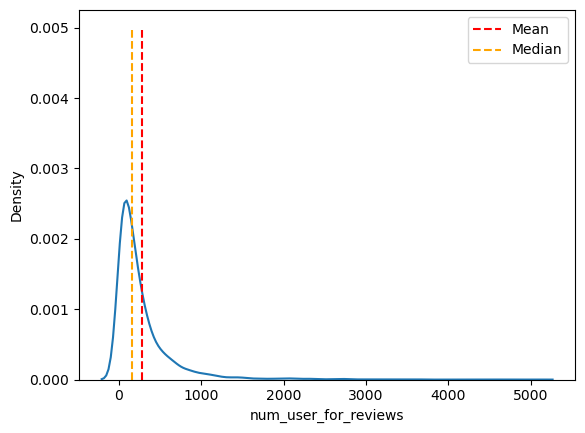

In [21]:
# Creating a kde plot for num_critic_for_reviews and drawing mean and median lines
sns.kdeplot(x='num_user_for_reviews', data=df)

plt.vlines(df['num_user_for_reviews'].mean(), ymin=0, ymax=0.005, linestyle='--', color='red', label='Mean')
plt.vlines(df['num_user_for_reviews'].median(), ymin=0, ymax=0.005, linestyle='--', color='orange', label='Median')
plt.legend()
plt.show()

Since, mean and median have very different values. So, we'll be filling the null values in num_user_for_reviews with median.

In [22]:
# Filling the null values in num_critic_for_reviews with median
df['num_user_for_reviews'].fillna(df['num_user_for_reviews'].median(), inplace=True)

# Checking for null values in num_critic_for_reviews
df['num_user_for_reviews'].isna().sum()

0

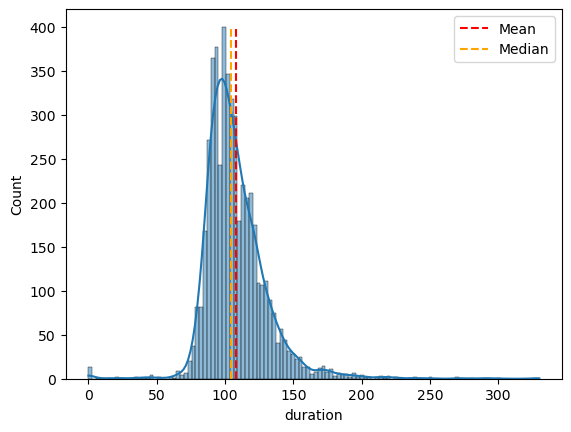

In [23]:
# Plotting histplot of duration column and seeing the mean and median
sns.histplot(x='duration', data=df, kde=True)
plt.vlines(df['duration'].mean(), ymin=0, ymax=400, linestyle='--', color='red', label='Mean')
plt.vlines(df['duration'].median(), ymin=0, ymax=400, linestyle='--', color='orange', label='Median')
plt.legend()
plt.show()

The mean and median are very close. So, we can use any to fill the missing values.

In [24]:
# Filling the null values in duration with mean values.
df['duration'].fillna(df['duration'].mean(), inplace=True)

# Checking for null values in duration column
df['duration'].isna().sum()

0

In [25]:
# Checking the count of each language 
df['language'].value_counts().sort_values(ascending=False).head()

language
English     4602
French        72
Spanish       40
Hindi         28
Mandarin      26
Name: count, dtype: int64

English language has the highest occurance. So, we'll be filling the null values in language column with mode.

In [26]:
# Filling null values in language column with mode
df['language'].fillna(df['language'].mode().iloc[0], inplace=True)

## Checking for null values in duration column
df['language'].isna().sum()

0

In [27]:
df.isna().sum()

director_name             0
num_critic_for_reviews    0
duration                  0
gross                     0
genres                    0
actor_1_name              0
movie_title               0
num_voted_users           0
num_user_for_reviews      0
language                  0
budget                    0
title_year                0
imdb_score                0
dtype: int64

All the null values have been filled or removed.

In [28]:
# Creating a new column 'Profit'
df['profit'] = df['gross'] - df['budget']

In [29]:
# Converting profit columns in millions by dividing by 1000000
df['profit']=df['profit']/1000000
df

,director_name,num_critic_for_reviews,duration,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,profit
0,James Cameron,723,178,760505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237000000,2009,7.9,523.505847
1,Gore Verbinski,302,169,309404152,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,300000000,2007,7.1,9.404152
2,Sam Mendes,602,148,200074175,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,245000000,2015,6.8,-44.925825
3,Christopher Nolan,813,164,448130642,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,250000000,2012,8.5,198.130642
4,Doug Walker,0,0,0,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,159.0,English,0,0,7.1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,Edward Burns,14,95,4584,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14.0,English,9000,2011,6.4,-0.004416
5038,Scott Smith,1,87,0,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,6.0,English,0,2013,7.7,0.000000
5040,Benjamin Roberds,13,76,0,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,3.0,English,1400,2013,6.3,-0.001400
5041,Daniel Hsia,14,100,10443,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,9.0,English,0,2012,6.3,0.010443


In [30]:
# Sorting on profit column
df.sort_values('profit', ascending=False)

,director_name,num_critic_for_reviews,duration,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,profit
0,James Cameron,723,178,760505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237000000,2009,7.9,523.505847
29,Colin Trevorrow,644,124,652177271,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290.0,English,150000000,2015,7.0,502.177271
26,James Cameron,315,194,658672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,200000000,1997,7.7,458.672302
3024,George Lucas,282,125,460935665,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470.0,English,11000000,1977,8.7,449.935665
3080,Steven Spielberg,215,120,434949459,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515.0,English,10500000,1982,7.9,424.449459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,Katsuhiro Ôtomo,105,103,410388,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,Steamboy,13727,79.0,Japanese,2127519898,2004,6.9,-2127.109510
2323,Hayao Miyazaki,174,134,2298191,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,570.0,Japanese,2400000000,1997,8.4,-2397.701809
3005,Lajos Koltai,73,134,195888,Drama|Romance|War,Marcell Nagy,Fateless,5603,45.0,Hungarian,2500000000,2005,7.1,-2499.804112
3859,Chan-wook Park,202,112,211667,Crime|Drama,Min-sik Choi,Lady Vengeance,53508,131.0,Korean,4200000000,2005,7.7,-4199.788333


In [31]:
# Top 10 Movies by profit 
df.sort_values('profit', ascending=False).head(10).loc[:,['movie_title', 'profit']]

,movie_title,profit
0,Avatar,523.505847
29,Jurassic World,502.177271
26,Titanic,458.672302
3024,Star Wars: Episode IV - A New Hope,449.935665
3080,E.T. the Extra-Terrestrial,424.449459
794,The Avengers,403.279547
17,The Avengers,403.279547
509,The Lion King,377.783777
240,Star Wars: Episode I - The Phantom Menace,359.544677
66,The Dark Knight,348.316061


In [32]:
#IMDB Top 250 Movies
Top_250_movies = df.sort_values('imdb_score',ascending=False).head(250).loc[:,['movie_title', 'language', 'imdb_score']]

In [33]:
#Inserting rank column
Top_250_movies['Rank'] = Top_250_movies['imdb_score'].rank(method='first', ascending=False)
Top_250_movies

,movie_title,language,imdb_score,Rank
2765,Towering Inferno,English,9.5,1.0
1937,The Shawshank Redemption,English,9.3,2.0
3466,The Godfather,English,9.2,3.0
4409,Kickboxer: Vengeance,English,9.1,4.0
2837,The Godfather: Part II,English,9.0,5.0
...,...,...,...,...
307,Blood Diamond,English,8.0,246.0
4664,Pandora's Box,German,8.0,247.0
1747,Aladdin,English,8.0,248.0
3456,Persepolis,French,8.0,249.0


In [34]:
# Movies not in English in Top 250 Movies. Movie with unknown languages are also included in this list.
Top_250_movies[Top_250_movies['language']!='English']

,movie_title,language,imdb_score,Rank
4498,"The Good, the Bad and the Ugly",Italian,8.9,11.0
4747,Seven Samurai,Japanese,8.7,19.0
4029,City of God,Portuguese,8.7,22.0
2373,Spirited Away,Japanese,8.6,29.0
4921,Children of Heaven,Persian,8.5,40.0
3870,Airlift,Hindi,8.5,44.0
4259,The Lives of Others,German,8.5,46.0
1298,Amélie,French,8.4,60.0
4659,A Separation,Persian,8.4,70.0
2323,Princess Mononoke,Japanese,8.4,71.0


In [35]:
# Top 10 director
round(df.groupby('director_name').imdb_score.mean().sort_values(ascending=False).head(10),2)

director_name
John Blanchard      9.5
Cary Bell           8.7
Sadyk Sher-Niyaz    8.7
Mitchell Altieri    8.7
Mike Mayhall        8.6
Charles Chaplin     8.6
Damien Chazelle     8.5
Ron Fricke          8.5
Majid Majidi        8.5
Raja Menon          8.5
Name: imdb_score, dtype: float64

In [36]:
# Separating Genre as genre1 and genre2
g = df['genres'].str.split('|', expand=True).iloc[:,0:2]
g.columns = ['genre1', 'genre2']
# g.genre2.fillna(g.genre1,inplace=True)
g

,genre1,genre2
0,Action,Adventure
1,Action,Adventure
2,Action,Adventure
3,Action,Thriller
4,Documentary,None
...,...,...
5037,Comedy,Drama
5038,Comedy,Drama
5040,Drama,Horror
5041,Comedy,Drama


In [37]:
# Finding the top genres
g.groupby('genre1').value_counts().sort_values(ascending=False)

genre1    genre2   
Comedy    Drama        513
Action    Adventure    463
Crime     Drama        274
Action    Crime        208
Drama     Romance      196
                      ... 
Fantasy   Thriller       1
Action    Sport          1
Comedy    Short          1
Family    Music          1
Thriller  Western        1
Name: count, Length: 106, dtype: int64

In [38]:
# Critic Favorite and Auidence Favorite Actor
# taking Meryl Streep, Leonardo DiCaprio and Brad Pitt
meryl_streep = df[df['actor_1_name']=='Meryl Streep']
leo_dicaprio = df[df['actor_1_name']=='Leonardo DiCaprio']
brad_pitt = df[df['actor_1_name']=='Brad Pitt']
combined = pd.concat([meryl_streep, leo_dicaprio, brad_pitt])
combined

,director_name,num_critic_for_reviews,duration,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,profit
410,Nancy Meyers,187,120,112703470,Comedy|Drama|Romance,Meryl Streep,It's Complicated,69860,214.0,English,85000000,2009,6.6,27.703470
1106,Curtis Hanson,42,111,46815748,Action|Adventure|Crime|Thriller,Meryl Streep,The River Wild,32544,69.0,English,45000000,1994,6.3,1.815748
1204,Nora Ephron,252,123,94125426,Biography|Drama|Romance,Meryl Streep,Julie & Julia,79264,277.0,English,40000000,2009,7.0,54.125426
1408,David Frankel,208,109,124732962,Comedy|Drama|Romance,Meryl Streep,The Devil Wears Prada,286178,631.0,English,35000000,2006,6.8,89.732962
1483,Robert Redford,227,92,14998070,Drama|Thriller|War,Meryl Streep,Lions for Lambs,41170,298.0,English,35000000,2007,6.2,-20.001930
1575,Sydney Pollack,66,161,87100000,Biography|Drama|Romance,Meryl Streep,Out of Africa,52339,200.0,English,31000000,1985,7.2,56.100000
1618,David Frankel,234,100,63536011,Comedy|Drama|Romance,Meryl Streep,Hope Springs,34258,178.0,English,30000000,2012,6.3,33.536011
1674,Carl Franklin,64,127,23209440,Drama,Meryl Streep,One True Thing,9283,112.0,English,30000000,1998,7.0,-6.790560
1752,Stephen Frears,87,110,0,Biography|Comedy|Drama|Music|Romance,Meryl Streep,Florence Foster Jenkins,2167,32.0,English,29000000,2016,7.1,-29.000000
1925,Stephen Daldry,174,114,41597830,Drama|Romance,Meryl Streep,The Hours,102123,660.0,English,25000000,2002,7.6,16.597830


In [39]:
# Converting num_users_for_reviews from object to float
combined['num_user_for_reviews'] = combined['num_user_for_reviews'].astype(float)

In [40]:
combined.groupby('actor_1_name')[['num_critic_for_reviews','num_user_for_reviews']].mean()

,num_critic_for_reviews,num_user_for_reviews
actor_1_name,,
Brad Pitt,231.944444,702.444444
Leonardo DiCaprio,330.190476,914.476190
Meryl Streep,163.153846,257.307692


In [41]:
# Creating decade column
df['decade'] = df['title_year'].apply(lambda x:(x//10)*10).astype(int)
df['decade'] = df['decade'].astype(str)+'s'
df = df.sort_values('decade')
df

,director_name,num_critic_for_reviews,duration,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,profit,decade
279,Christopher Barnard,0,22,0,Comedy,Mathew Buck,"10,000 B.C.",6,0.0,English,0,0,7.2,0.000000,0s
2870,Niels Arden Oplev,0,88,0,Action|Crime|Mystery|Thriller,Michael Nyqvist,Del 1 - Män som hatar kvinnor,335,0.0,Swedish,0,0,8.1,0.000000,0s
4,Doug Walker,0,0,0,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,159.0,English,0,0,7.1,0.000000,0s
2765,John Blanchard,0,65,0,Comedy,Martin Short,Towering Inferno,10,0.0,English,0,0,9.5,0.000000,0s
4810,D.W. Griffith,69,123,0,Drama|History|War,Lillian Gish,Intolerance: Love's Struggle Throughout the Ages,10718,88.0,English,385907,1916,8.0,-0.385907,1910s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,Ben Stassen,56,88,0,Adventure|Animation|Family,Ed Begley Jr.,A Turtle's Tale: Sammy's Adventures,5385,22.0,English,0,2010,6.1,0.000000,2010s
3986,Kevin Carraway,11,88,0,Action|Thriller,Michael Jai White,Chain of Command,801,14.0,English,5000000,2015,3.5,-5.000000,2010s
800,Akiva Goldsman,189,118,22451,Drama|Fantasy|Mystery|Romance,Matt Bomer,Winter's Tale,41288,126.0,English,60000000,2014,6.2,-59.977549,2010s
791,Scott Stewart,225,87,29136626,Action|Fantasy|Horror|Sci-Fi|Thriller,Josh Wingate,Priest,97089,233.0,English,60000000,2011,5.7,-30.863374,2010s


In [42]:
# Showing number of voted users in each decade
df_decade = df.groupby('decade')
df_decade['num_voted_users'].sum()
df_decade = pd.DataFrame(df_decade['num_voted_users'].sum())
df_decade

,num_voted_users
decade,
0s,359
1910s,10718
1920s,128672
1930s,984397
1940s,1211888
1950s,1638504
1960s,5153052
1970s,11312705
1980s,23176169


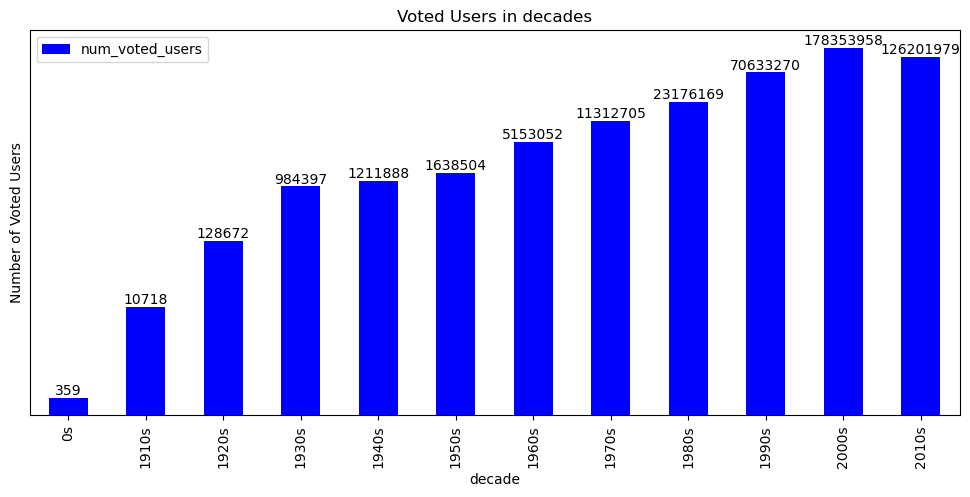

In [48]:
# Plotting the graph for number of voted users in each decade
df_decade.plot(kind='bar', ylabel='Number of Voted Users', color='blue', logy=True,
               title = 'Voted Users in decades',figsize=(12,5))

# Annotating the bars with the values
for i, v in enumerate(df_decade['num_voted_users']):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.minorticks_off()
plt.yticks([])
# Showing the plot
plt.show()